In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

import pds_plots as ppl

/opt/anaconda3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
fname = "coords_20190626_1_6.npz"
f = np.load(fname)

bbox = [[0, 700], [0-20, 700], [0, 200]]


def limit_to_box(x, box):
    mf = x.copy()
    for i, t in enumerate(box):
        mf = mf[mf[:,i]>=t[0], :]
        mf = mf[mf[:,i]<=t[1], :]
    return mf


def fix_coors(x):
    y = x-np.ones(x.shape[1])*25
    box = [bbox[0], [bbox[1][0]+20, bbox[1][1]], bbox[2]]
    return limit_to_box(y, box[:x.shape[1]])


mf = f['mf']
mf = fix_coors(mf)

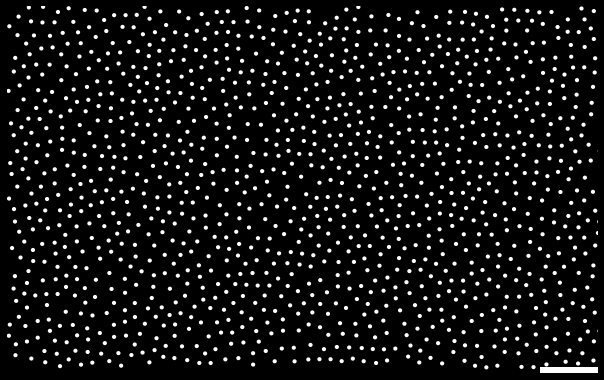

In [35]:
fname = "coords_20190626_4.npz"
f = np.load(fname)

bbox = [[0, 1500], [0-20, 700], [0, 200]]

mf = f['mf']
mf = fix_coors(mf)

bbox = [[0, 700*8/5], [0-10, 700], [0, 200]]
bbox2 = bbox[:2]

plt.style.use('dark_background')
ax = ppl.plot_mf_1(mf, bbox2, 8/2, save=False)
ax.plot([bbox2[0][1]-100, bbox2[0][1]], [bbox2[1][0]+2.5, bbox2[1][0]+2.5], 'w', linewidth=10)
# ppl.plot_mf_2(mf, [1500, 700], save=True)
plt.tight_layout()
plt.savefig('mf.png', dpi=300/2.54)

In [13]:

goc = f['goc']
goc = fix_coors(goc)

ax = ppl.plot_goc(goc, bbox, 100, 13.5)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc.png', dpi=300/2.54)

KeyError: 'goc is not a file in the archive'

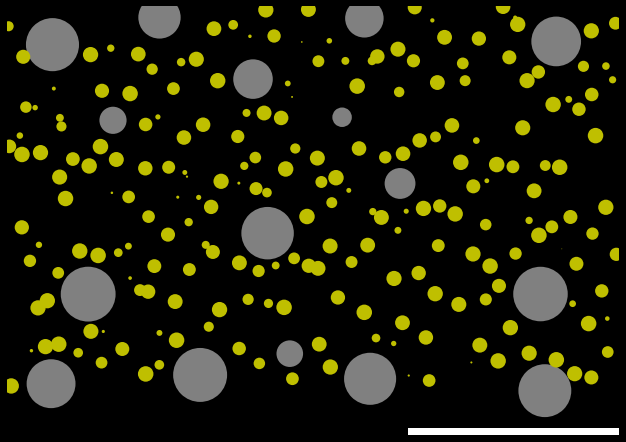

In [47]:
glo = f['glo']
glo = fix_coors(glo)

ax = ppl.plot_goc_glo((goc, 13.5), (glo, 7.6 / 2), bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc+glo.png', dpi=300/2.54)
#         plt.savefig('goc+glo.png', dpi=300

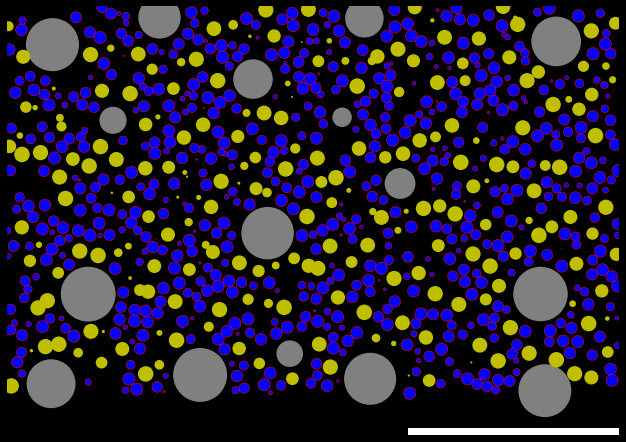

In [48]:
grc = f['grc_nop']
grc = fix_coors(grc)

ax = ppl.plot_all_pop(
    (goc, 13.5),
    (glo, 7.6 / 2),
    (grc, 3),
    bbox, 100)
ax.plot([bbox[0][1]-100, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('all.png', dpi=300)

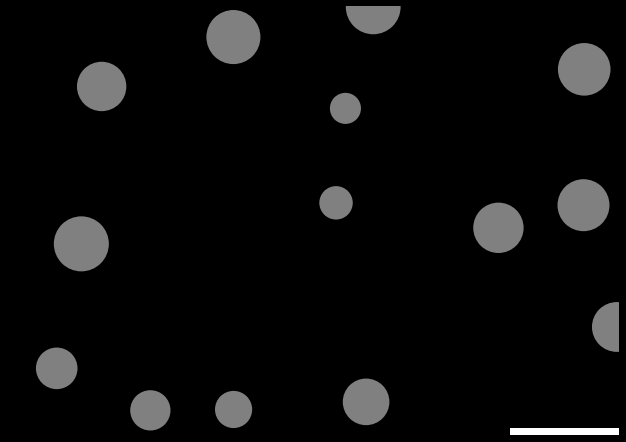

In [49]:

fname = "coords_20190626_1_1.npz"

f = np.load(fname)


bbox = [[0, 1500], [0-10, 700], [0, 200]]


mf = f['mf']
mf = fix_coors(mf)

goc = f['goc']
goc = fix_coors(goc)

glo = f['glo']
glo = fix_coors(glo)



def to_saggit(x):
    y = x.copy()
    y[:,0] = x[:,1]
    y[:,1] = x[:,2]
    y[:,2] = x[:,0]    
    return y

def to_medlat(x):
    y = x.copy()
    y[:,0] = x[:,0]
    y[:,1] = x[:,2]
    y[:,2] = x[:,1]
    return y


goc1 = to_saggit(goc)
glo1 = to_saggit(glo)
grc1 = to_saggit(grc)
grc = f['grc_nop']
grc = fix_coors(grc)
grc = f['grc_nop']
grc = fix_coors(grc)


bbox = [[200, 500], [0-10, 200], [0, 500]]


ax = ppl.plot_goc(goc1, bbox, 100, 13.5)
ax.plot([bbox[0][1]-50, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc_sag.png', dpi=300)

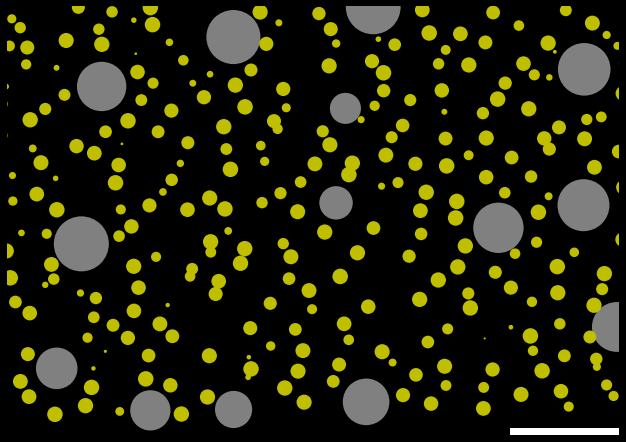

In [50]:
ax = ppl.plot_goc_glo((goc1, 13.5), (glo1, 7.6 / 2), bbox, 100)
ax.plot([bbox[0][1]-50, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('goc+glo_sag.png', dpi=300)

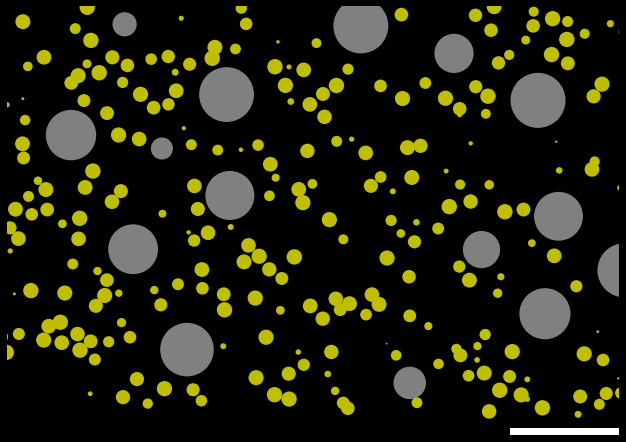

In [51]:
goc2 = to_medlat(goc)
glo2 = to_medlat(glo)
# grc = to_yzx(grc)

ax = ppl.plot_goc_glo((goc2, 13.5), (glo2, 6.6 / 1.75), bbox, 100)
ax.plot([bbox[0][1]-50, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)

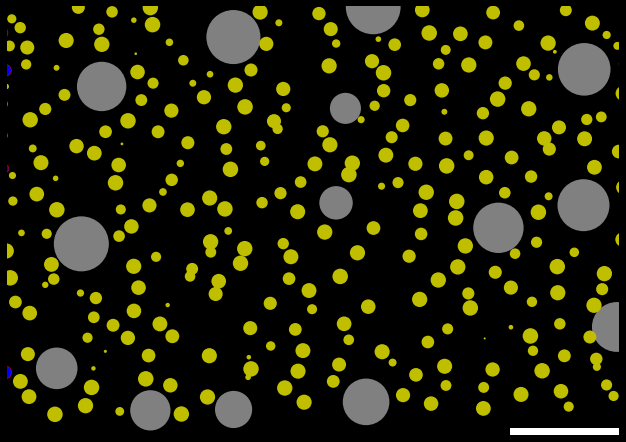

In [52]:
bbox = [[200, 500], [0-10, 200], [0, 500]]

ax = ppl.plot_all_pop(
    (goc1, 13.5),
    (glo1, 7.6/2),
    (grc1, 3.25),
    bbox, 100)
ax.plot([bbox[0][1]-50, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('all_sag.png', dpi=300)

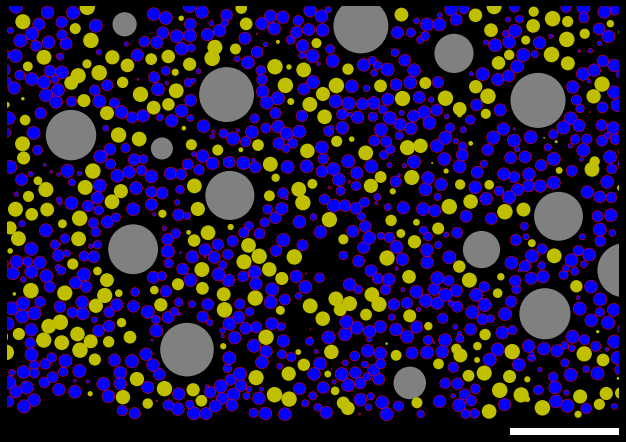

In [53]:
goc2 = to_medlat(goc)
glo2 = to_medlat(glo)
grc2 = to_medlat(grc)


# grc = to_yzx(grc)

ax = ppl.plot_all_pop(
    (goc2, 13.5),
    (glo2, 7.6/2),
    (grc2, 3.25),
    bbox, 100)
ax.plot([bbox[0][1]-50, bbox[0][1]], [bbox[1][0], bbox[1][0]], 'w', linewidth=15)
plt.savefig('all_med.png', dpi=300)

In [ ]:
fname = "../fig_POPGEN/coords_20190626_1_4.npz"
f = np.load(fname)
f['grc_nop'].shape


grx = grc + np.random.randn(*grc.shape)*0.25
nn.fit(grx)
dists, nnids = nn.kneighbors(grx, n_neighbors=2, return_distance=True)


_ = plt.hist(dists, 500)
# _ = plt.hist(dists_u, 500)
plt.xlim([4, 10])


nn.fit(grc)
dists_u, nnids = nn.kneighbors(grc, n_neighbors=2, return_distance=True)

nnids = nnids[:,1]
dists = dists[:,1]

dists_u = dists_u[:,1]
gry = limit_to_box(grx, [[30, 670], [30, 670], [30, 170]])

nn = NearestNeighbors(n_jobs=-1)
nn.fit(grx)

from tqdm.autonotebook import tqdm

mcounts = []
sdcounts = []
dists = np.linspace(0, 30, 120)
for r in tqdm(dists):
    count = np.frompyfunc(lambda x: x.size, 1, 1)(nn.radius_neighbors(
        gry, radius=r, return_distance=False
    )).astype(float) - 1
    mcounts.append(count.mean())
    sdcounts.append(count.std()/np.sqrt(count.size))
# mcount = count.mean()
# sdcount = count.std()
# print('{} ± {}'.format(mcount, sdcount))

cc2 = np.gradient(mcounts)/(dists**2)
cc2_0 = cc2[-1]
cc2 = cc2/cc2_0
plt.plot(dists, cc2)

mcounts = np.array(mcounts)
sdcounts = np.array(sdcounts)

_, ax = plt.
cc2_u = np.gradient(mcounts + 150*sdcounts)/(dists**2+0.001)/cc2_0
cc2_d = np.gradient(mcounts - 150*sdcounts)/(dists**2+0.001)/cc2_0
# plt.fill_between(dists, cc2_d, cc2_u)
plt.fill_between(dists, cc2_d, cc2_u, alpha=0.5)
plt.plot(dists, cc2, 'k')